In [2]:
#Main Script
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import os
import matplotlib.pyplot as plt

#Fix random seed for reproducibility
np.random.seed(7)
#Load the dataset
dataset = loadtxt(r'C:\Users\LEGION\Machine_Learning_Learn_Project\Intro_Deep_Learning\pima-indians-diabetes.csv', delimiter=',')
#Split into X and y
nvar = dataset.shape[1]-1
X = dataset[:,:nvar]
y = dataset[:,-1]

##Define keras model

#In this example, use a fully-connected network structure with three layes
#Fully connected layers are defined using the Dense class.
#Use ReLU for the activation function of the first two layers and Sigmoid in the output layer.

#Define keras model
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

##Compile Keras model

#Use cross entropy as the loss argument.
#Use adam optimizer, a popular version of stochastic gradient descent algorithm since it automatically tunes itself and gives
#good results for a wide range of problems.
#Use accuracy for metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##Fit Keras Model

#Epoch: One pass through all of the rows in the training dataset.
#Batch: One or more samples considered by the model within an epoch before weights are updated.
history = model.fit(X, y, epochs=150, batch_size=10, validation_split = 0.33, verbose=0)

##Evaluate Keras Model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f%%' %(accuracy*100))

#List all data in history
print(history.history.keys())



24/24 [==============================] - 0s 918us/step - loss: 0.5639 - accuracy: 0.7227
Accuracy: 72.27%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


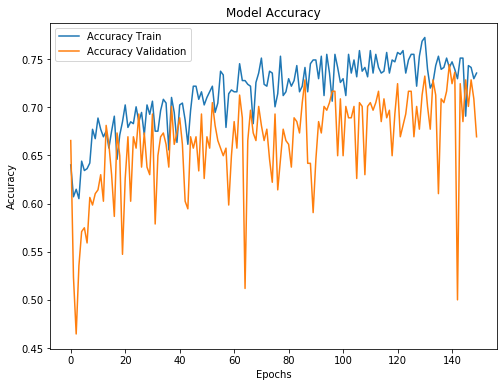

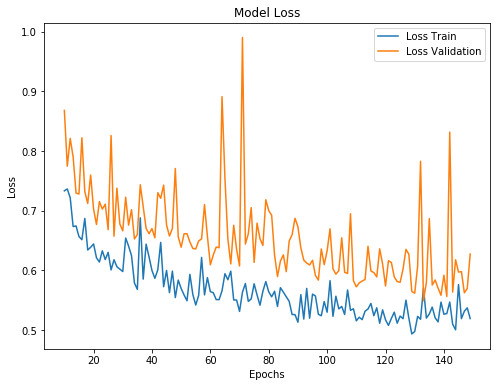

In [13]:
#Summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],label='Accuracy Train')
plt.plot(history.history['val_accuracy'],label='Accuracy Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

#Summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(np.arange(10,150,1),history.history['loss'][10:],label='Loss Train')
plt.plot(np.arange(10,150,1),history.history['val_loss'][10:],label='Loss Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()
